<a href="https://colab.research.google.com/github/oksuzian/Mu2eANL/blob/master/CRV-II/CRV_II_g4bl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Initilize and open root file

In [1]:
!pip install uproot
import uproot
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

try:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=False)
    main_path = '/content/drive/My Drive/'
except:
    main_path = ''
sys.path.append(main_path)
fig_path = main_path+'CRV-II'
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')
root_file = uproot.open(main_path+"CRV-II/g4beamline.root")

NBARS_PER_LAYER=32

     |████████████████████████████████| 122kB 4.2MB/s 
     |████████████████████████████████| 92kB 4.8MB/s 
Mounted at /content/drive


##Make dataframes

In [4]:
plane1  = root_file["VirtualDetector"]["plane1"]
plane2  = root_file["VirtualDetector"]["plane2"]

df_plane1 = plane1.pandas.df()
df_plane2 = plane2.pandas.df()

In [6]:
det_list = root_file["Detector"].values()
import pandas as pd
df_det = det_list[0].pandas.df()
df_det['barID'] = 0
df_det['layerID'] = 0
for count, iDet in enumerate(det_list[1:]):
  iDet = iDet.pandas.df()
  iDet['barID'] = count
  iDet['layerID'] = int(count/NBARS_PER_LAYER)
  df_det = pd.concat([df_det, iDet])

In [9]:
mask = (abs(df_plane1['PDGid'])==13) & (df_plane1['InitKE']> 1000)
good_events1 = df_plane1['EventID'][mask].tolist()
mask = (abs(df_plane2['PDGid'])==13) & (df_plane2['InitKE']> 1000)
good_events2 = df_plane2['EventID'][mask].tolist()

df_det_filt = df_det[df_det['EventID'].isin(good_events2)]

In [22]:
df_bar = df_det_filt.groupby(['EventID', 'barID']).agg({'VisibleEdep': ['sum']})
df_bar.columns = ['VisibleEdepTot']
df_bar = df_bar.reset_index()

In [23]:
df_layer = df_det_filt.groupby(['EventID', 'layerID']).agg({'VisibleEdep': ['sum']})
df_layer.columns = ['VisibleEdepTot']
df_layer = df_layer.reset_index()

In [27]:
df_module = df_det_filt.groupby(['EventID']).agg({'VisibleEdep': ['sum']})
df_module.columns = ['VisibleEdepTot']
df_module = df_module.reset_index()

##Make plots

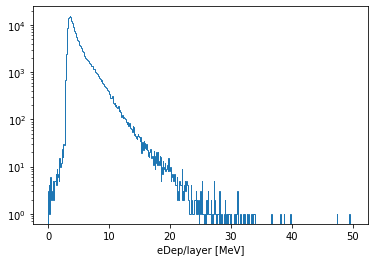

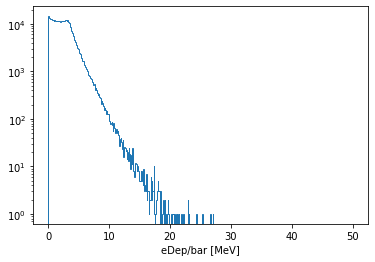

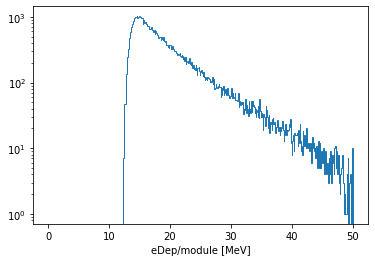

In [29]:
plt.hist(df_layer['VisibleEdepTot'], bins=500, range=(0, 50), histtype='step');
plt.xlabel('eDep/layer [MeV]')
plt.yscale('log')

plt.figure()
plt.hist(df_bar['VisibleEdepTot'], bins=500, range=(0, 50), histtype='step');
plt.xlabel('eDep/bar [MeV]')
plt.yscale('log')

plt.figure()
plt.hist(df_module['VisibleEdepTot'], bins=500, range=(0, 50), histtype='step');
plt.xlabel('eDep/module [MeV]')
plt.yscale('log')

<Figure size 432x288 with 0 Axes>

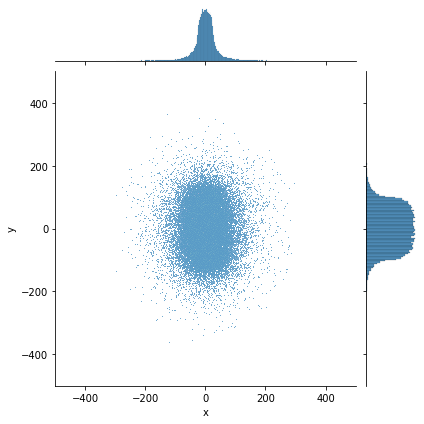

<Figure size 432x288 with 0 Axes>

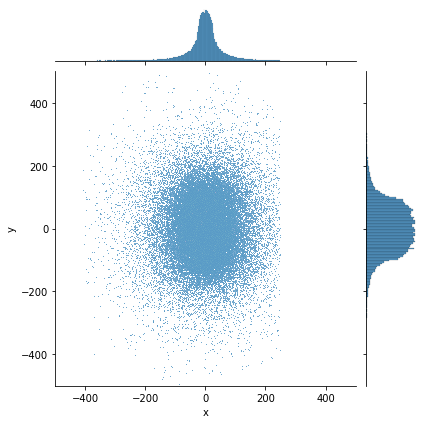

<Figure size 432x288 with 0 Axes>

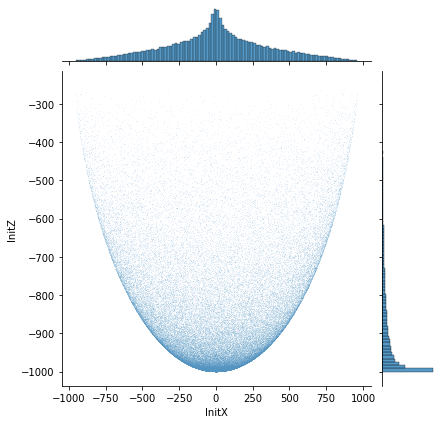

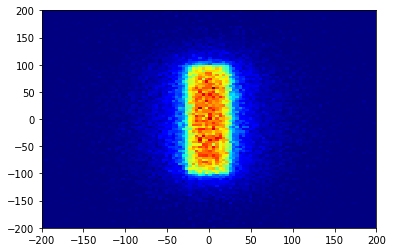

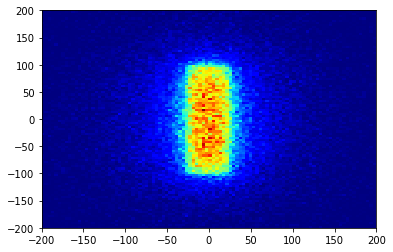

In [9]:
plt.figure()
sns.jointplot(x="x", y="y", edgecolor="white", xlim=(-500,500), ylim=(-500,500), joint_kws={"s": 1}, data=df_plane1);
plt.figure()
sns.jointplot(x="x", y="y", xlim=(-500,500), ylim=(-500,500), joint_kws={"s": 1}, data=df_plane2);
plt.figure()
mask = abs(df_plane2['PDGid'])==13
sns.jointplot(x="InitX", y="InitZ", joint_kws={"s": 0.1}, data=df_plane2[mask]);
plt.figure()
plt.hist2d(df_plane1['x'], df_plane1['y'], (100, 100), range=((-200, 200), (-200, 200)), cmap=plt.cm.jet);
plt.figure()
plt.hist2d(df_plane2['x'], df_plane2['y'], (100, 100), range=((-200, 200), (-200, 200)), cmap=plt.cm.jet);

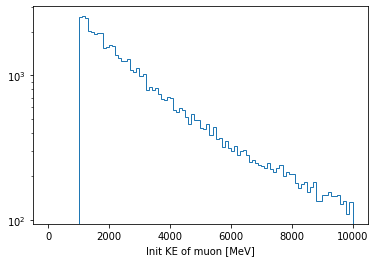

In [83]:
mask = (abs(df_plane1['PDGid'])==13) & (df_plane1['InitKE']> 1000)
plt.hist(df_plane1['InitKE'][mask], bins=100, range=(0,10000), histtype='step');
plt.yscale('log')
plt.xlabel('Init KE of muon [MeV]');

<Figure size 432x288 with 0 Axes>

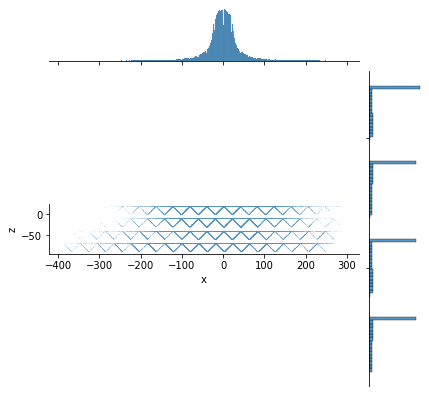

<Figure size 432x288 with 0 Axes>

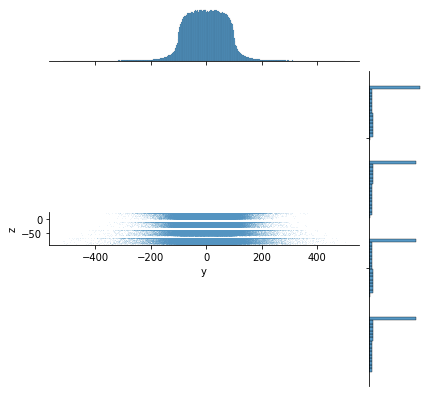

<Figure size 432x288 with 0 Axes>

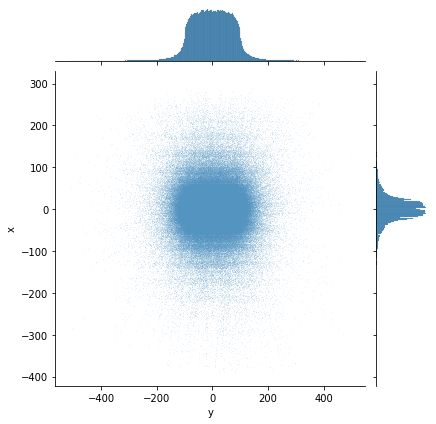

In [27]:
plt.figure()
mask = abs(df_det['PDGid'])==13
joint = sns.jointplot(x=df_det['x'][mask], y=(-1)*df_det['z'][mask], joint_kws={"s": 0.1});
joint.ax_joint.set_aspect('equal')  # equal aspect ratio

plt.figure()
joint = sns.jointplot(x=df_det['y'][mask], y=(-1)*df_det['z'][mask], joint_kws={"s": 0.1});
joint.ax_joint.set_aspect('equal')  # equal aspect ratio

plt.figure()
sns.jointplot(x="y", y="x", joint_kws={"s": 0.1}, data=df_det[mask]);

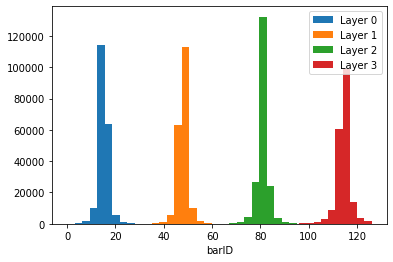

In [59]:
for layer in range(0, 4):
  plt.hist(df_det['barID'][df_det['layerID']==layer], label='Layer %s' % layer);
plt.xlabel('barID');
plt.legend()

##Studying gap events

In [116]:
gap_event_list=list(df_layer['EventID'][df_layer['VisibleEdepTot']<1.])

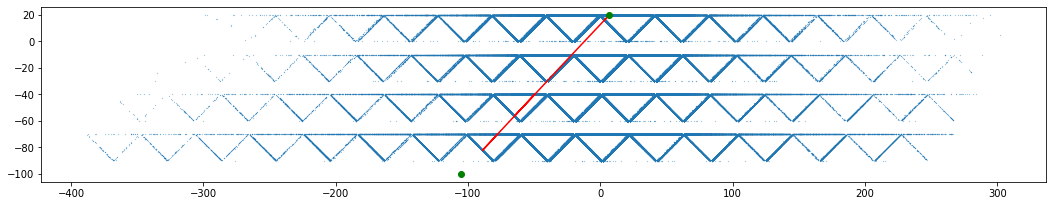

In [117]:
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111)

event_select=gap_event_list[15]

mask = (df_det['EventID']==event_select) & (abs(df_det['PDGid'])==13)
ax.scatter(x=df_det['x'], y=(-1)*df_det['z'], marker='.', s=0.1);
ax.plot(df_det['x'][mask], (-1)*df_det['z'][mask],'-r');

mask = (abs(df_plane1['EventID'])==event_select) & (abs(df_plane1['PDGid'])==13)
ax.plot(df_plane1['x'][mask], (-1)*df_plane1['z'][mask], 'og');

mask = (abs(df_plane2['EventID'])==event_select) & (abs(df_plane2['PDGid'])==13)
ax.plot(df_plane2['x'][mask], (-1)*df_plane2['z'][mask], 'og');

ax.set_aspect('equal')


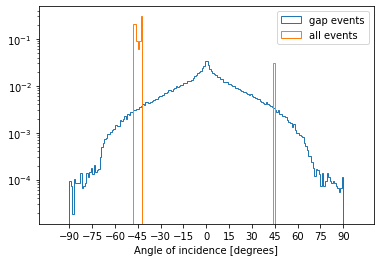

In [118]:
import math

mask = (df_plane2['EventID'].isin(gap_event_list)) & (abs(df_plane2['PDGid'])==13)
df_plane2_failed = df_plane2[mask]

x_hist=180/np.pi*np.arctan(df_plane2['Px']/df_plane2['Pz'])
plt.hist(x_hist, range=(-100,100), bins=200, density=True, histtype='step', label='gap events');
x_hist=180/np.pi*np.arctan(df_plane2_failed['Px']/df_plane2_failed['Pz'])
plt.hist(x_hist, range=(-100,100), bins=200, density=True, histtype='step', label='all events');

plt.legend()
plt.xlabel('Angle of incidence [degrees]')
plt.yscale('log')
plt.xticks(np.arange(-90, 91, 15));